In [687]:
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from collections import OrderedDict
import sys
import os
import seaborn as sns

In [688]:
data_root = '/Volumes/Samsung_T5/MIT/mta'
#os.listdir(data_root)

In [689]:

services_file = 'scapijus01.txt'
meds_file  = 'medse01.txt'
end_treat_file = 'debrief1401.txt'
cost_file = 'Collection_Documents/Derived Variables/B Excel Database/COST.xlsx' # find subject group assignment here 

#extract treatment group from cost excel file in supp data 

services = pd.read_csv(Path(data_root, services_file), delimiter='\t')
meds = pd.read_csv(Path(data_root, meds_file), delimiter='\t')
end_treat = pd.read_csv(Path(data_root, end_treat_file), delimiter='\t')
cost = pd.read_excel(Path(data_root, cost_file))

# colums are uppercase in original cost file 
cost_cols = [col.lower() for col in cost.columns]
cost.columns = cost_cols
cost.keys()


/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_68434/2125749166.py:8: DtypeWarning: Columns (0,1,2,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

Index(['subjectkey', 'src_subject_id', 'interview_age', 'interview_date',
       'gender', 'site', 'sjtyp', 'trtname', 'cmed', 'cteach', 'cdocs',
       'ctotal'],
      dtype='object')

In [690]:
#drop data with no date since I cannot interpret it 
services = services.dropna(subset =['interview_date'])
meds = meds.dropna(subset=['interview_date'])
end_treat = end_treat.dropna(subset=['interview_date'])

In [691]:
# verify no NaN left in interview date 
print(services['interview_date'].isna().sum())
print(meds['interview_date'].isna().sum())
print(end_treat['interview_date'].isna().sum())

0
0
0


In [692]:
services = services.drop(services.index[0])
meds = meds.drop(meds.index[0])
end_treat = end_treat.drop(end_treat.index[0])

In [693]:
services['sex'] = services['sex'].fillna('Not specified')
meds['sex'] = meds['sex'].fillna('Not specified')
end_treat['sex'] = end_treat['sex'].fillna('Not specified')

In [694]:

# transform date into datetime objects 
serv_date = pd.to_datetime(services['interview_date'], format='%m/%d/%Y')
meds_date = pd.to_datetime(meds['interview_date'], format='%m/%d/%Y')
end_treat_date = pd.to_datetime(end_treat['interview_date'], format='%m/%d/%Y')

# Instead of formatting to MM/YYYY string, adjust the dates to the first of each month
services['interview_date'] = serv_date.dt.to_period('M').dt.to_timestamp()
meds['interview_date'] = meds_date.dt.to_period('M').dt.to_timestamp()
end_treat['interview_date'] = end_treat_date.dt.to_period('M').dt.to_timestamp()

In [695]:
#services.loc[1:,'interview_date'] = pd.to_datetime(serv_date).dt.strftime('%m/%Y')
#meds.loc[1:,'interview_date']= pd.to_datetime(meds_date).dt.strftime('%m/%Y')
#end_treat.loc[1:,'interview_date'] = pd.to_datetime(end_treat_date).dt.strftime('%m/%Y')

In [696]:
meds.keys()

Index(['collection_id', 'medse01_id', 'dataset_id', 'subjectkey',
       'src_subject_id', 'interview_date', 'interview_age', 'sex', 'site',
       'trtname', 'mmvnum', 'visityn', 'mmday', 'mmdrug', 'mmdose', 'mmdaily',
       'asispme', 'tics5', 'vocal', 'motor', 'simple', 'complex', 'single',
       'mult', 'facial', 'othtic', 'ptawar', 'parawar', 'ticsev', 'se1anor',
       'se2insom', 'se3sedat', 'se4irrit', 'se5dep', 'se6worry', 'se7tics',
       'se8pick', 'se9stom', 'se10head', 'se11suic', 'se12toxc', 'se13hall',
       'se14oth1', 'se15oth2', 'seseris', 'sedstrs', 'cmpengag', 'cmpimple',
       'cmpmotiv', 'cmpoverl', 'collection_title'],
      dtype='object')

In [697]:
meds['mmdose'].unique()

array(['0', '5x5x5', '7.5x7.5x5', '7.5x7.5x0', '10x10x2.5', '12.5x12.5x5',
       '10x10x5', '2.5x0x0', '5x0x0', '2.5x2.5x0', '5x2.5x0', '5x3.75x0',
       '5x5x0', '7.5x5x0', '12.5x10x2.5', '15x10x5', '37.5x0',
       '37.5x18.75', '10x0x0', nan, '25x25', '15x15x10', '20x20x10',
       '20x20x15', '20x20x20', '20x25x20', '7.5x7.5x7.5x7.5',
       '20srx7.5x7.5x7.5x7.5', '10x10x7.5x7.5', '10x10x10x7.5',
       '12.5x12.5x10x10', '20sr+5x0x0', '20sr+10x0x0', '40srx0x0',
       '15x15x5', '20x40srx0', '10x10x10', '25x25x10', '10x5x5x5',
       '10x10x0', '10x10x7.5', '10x10x5x5', '10x20srx5', '5x2.5x2.5',
       '20sr+5x0x10', '5x5x2.5', '60x60', '100x75', '0.5', '.75x.75',
       '25x15x10', '10x10x15', '20srx20sr', '20x15x10', '15x15x7.5',
       '15x15x2.5', '17.5x17.5x10', '25x20x10', '20x20x0', '25x25x0',
       '20x20srx10', '20x10x10', '20x15x15', '18.75x0', '20sr+5',
       '10x20srx0', '20srx0x0', '20srx0x5', '7.5x7.5x7.5', '12.5x10x10',
       '12.5x12.5x10', '15x10x10', '56.25

In [698]:
# base info on subject (age, gender, date)
min_sub_info = ['subjectkey']
subject_info_col = ['subjectkey',  'interview_date', 'sex']


In [699]:
treat_group_col = min_sub_info.copy()
treat_group_col.append('trtname')

treat_group = cost[treat_group_col]
treat_group_names = cost['trtname'].unique()[1:]
treat_group['subjectkey'].unique().shape

(579,)

In [700]:
sub_m = treat_group.query("trtname == 'M'") #medi
sub_c = treat_group.query("trtname == 'C'") #'combined'
sub_p = treat_group.query("trtname == 'P'") # psychosocial 
print(sub_m.shape, sub_c.shape, sub_p.shape)
sub_m.shape[0] + sub_p.shape[0] + sub_c.shape[0]

(144, 2) (145, 2) (144, 2)


433

In [701]:
#boolean vars if service has been provided 
# 1 = yes, 2 = no 


services_dict = { 'adhd_mon_visits' : 'monyn', # mediation monitoring visits 
                 'sv_school_serv_any' : 'ynsvc', # any school service 
                 'sv_room_spc_educ' : 'yn12', 
                 'sv_day_long_spec_educ' : 'yn13', 
                 #'sv_occup_th' : 'yn13_1', #1
                 'sv_speech_lang_th' : 'yn71',
                 'sv_sec_school_adhd_ld': 'yn101', 
                 'sv_school_couns' : 'yn14', 
                 'sv_gr_th': 'yn62',
                 'sv_ind_th_1' : 'yn63',
                 #'sv_spec_help_classroom': 'yn11_1', # no data 
                 'sv_after_school_treat_pg': 'yn24', 
                 'sv_spec_end_treat_adhd_ld_beh': 'yn51',
                 'sv_tut_non_par' : 'yn67', 
                 'sv_rem_summ_school' : 'yn93',
                 'sv_indiv_edu_plan' : 'yn65', 
                 'sv_school_serv_other': 'yn99',
                 'therapy_any': 'ynthe', # any therapy service 
                 'th_aa_na': 'yn1',
                 'th_mta_treat_pg': 'yn2',
                 'th_we_treat_pg': 'yn3',
                 'th_after_school_treat_pg': 'yn4', 
                 'th_soc_skills': 'yn5',
                 'th_recre' : 'yn6',
                 'th_drug': 'yn7', 
                 'th_group': 'yn8', 
                 'th_indiv:' : 'yn9',
                 'th_non_mda_summer_treat_pg': 'yn10', 
                 #'th_psyt_hosp': 'yn11_2',  # no data 
                 #'th_board_school': 'yn12_1', 
                 #'th_res_fam': 'yn13_2',
                 #'th_home_case_mang': 'yn14_1', 
                 #'th_24_7_treat' : 'yn15_1', 
                 'th_yth_shelter': 'yn16', 
                 'th_non_milit_bootcamp': 'yn17'}

In [702]:
# extract medication and dose 
drug_cols = subject_info_col.copy()
drug_append = ['mmdrug', 'mmdose']
drug_cols = np.concatenate((drug_cols, drug_append))

drugs = meds[drug_cols]
drug_names = meds['mmdrug'].unique()[1:] # drop var description
drugs['mmdose'].unique()

array(['0', '5x5x5', '7.5x7.5x5', '7.5x7.5x0', '10x10x2.5', '12.5x12.5x5',
       '10x10x5', '2.5x0x0', '5x0x0', '2.5x2.5x0', '5x2.5x0', '5x3.75x0',
       '5x5x0', '7.5x5x0', '12.5x10x2.5', '15x10x5', '37.5x0',
       '37.5x18.75', '10x0x0', nan, '25x25', '15x15x10', '20x20x10',
       '20x20x15', '20x20x20', '20x25x20', '7.5x7.5x7.5x7.5',
       '20srx7.5x7.5x7.5x7.5', '10x10x7.5x7.5', '10x10x10x7.5',
       '12.5x12.5x10x10', '20sr+5x0x0', '20sr+10x0x0', '40srx0x0',
       '15x15x5', '20x40srx0', '10x10x10', '25x25x10', '10x5x5x5',
       '10x10x0', '10x10x7.5', '10x10x5x5', '10x20srx5', '5x2.5x2.5',
       '20sr+5x0x10', '5x5x2.5', '60x60', '100x75', '0.5', '.75x.75',
       '25x15x10', '10x10x15', '20srx20sr', '20x15x10', '15x15x7.5',
       '15x15x2.5', '17.5x17.5x10', '25x20x10', '20x20x0', '25x25x0',
       '20x20srx10', '20x10x10', '20x15x15', '18.75x0', '20sr+5',
       '10x20srx0', '20srx0x0', '20srx0x5', '7.5x7.5x7.5', '12.5x10x10',
       '12.5x12.5x10', '15x10x10', '56.25

In [703]:
drugs['mmdose'] = drugs['mmdose'].replace(to_replace=r'[^\d]x', value='', regex=True)


/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_68434/2276784209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['mmdose'] = drugs['mmdose'].replace(to_replace=r'[^\d]x', value='', regex=True)


In [704]:
drugs['mmdose']

1              0
2              0
3              0
4              0
5              0
          ...   
3427    20x20x10
3428       5s0x0
3429      20s0x5
3430      20s0x5
3431     20s10x0
Name: mmdose, Length: 3431, dtype: object

In [705]:
# verify again if this yields expected result everywhere 


pattern = r'(\d+\D+){2,3}\d+'

# Create a mask where True indicates rows that match the pattern
mask = drugs['mmdose'].str.match(pattern, na=False)
filtered_drugs = drugs[mask]
# Optionally remove 'sr' from entries
filtered_drugs['mmdose'] = filtered_drugs['mmdose'].str.replace('sr', '')

print(drugs.shape, filtered_drugs.shape)


drugs[['Morning', 'Midday', 'Evening', 'Night']] = (
    drugs['mmdose'].str.split(r'\D+', n=3, expand=True).fillna('0')
)
drugs
# Convert columns to integer type after replacing missing splits with '0'
#drugs[['Morning', 'Midday', 'Evening', 'Night']] = drugs[['Morning', 'Midday', 'Evening', 'Night']].fillna('0').astype(int)

(3431, 5) (3010, 5)


/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_68434/512508893.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_drugs['mmdose'] = filtered_drugs['mmdose'].str.replace('sr', '')
/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_68434/512508893.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs[['Morning', 'Midday', 'Evening', 'Night']] = (
/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_68434/512508893.py:15: SettingWithCopyWarning: 
A value is trying to b

,subjectkey,interview_date,sex,mmdrug,mmdose,Morning,Midday,Evening,Night
1,NDAR_INVXP413AM1,1997-09-01,M,No drug,0,0,0,0,0
2,NDAR_INVFC713CVK,1997-09-01,M,No drug,0,0,0,0,0
3,NDAR_INVFC713CVK,1997-10-01,M,No drug,0,0,0,0,0
4,NDAR_INVFC713CVK,1997-11-01,M,No drug,0,0,0,0,0
5,NDAR_INVFC713CVK,1997-12-01,M,No drug,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3427,NDAR_INVHK435ZRN,1995-07-01,M,Ritalin,20x20x10,20,20,10,0
3428,NDAR_INVHK435ZRN,1995-08-01,M,Dexedrine,5s0x0,5,0,0,0
3429,NDAR_INVHK435ZRN,1995-09-01,M,Dexedrine,20s0x5,20,0,5,0
3430,NDAR_INVHK435ZRN,1995-10-01,M,Dexedrine,20s0x5,20,0,5,0


In [706]:
print(services['subjectkey'].unique().shape, meds['subjectkey'].unique().shape,  end_treat['subjectkey'].unique().shape)

(579,) (290,) (284,)


In [707]:
treat_group['subjectkey'].unique().shape

(579,)

In [708]:
serv_bools_col = subject_info_col.copy()
append = [ val for val in services_dict.values()]
serv_bools_col = np.concatenate((serv_bools_col, append))

serv_bools = services[ serv_bools_col]
serv_bools.keys()
serv_bools['subjectkey'].unique().shape


(579,)

In [709]:
print(services['interview_date'].isna().sum()
, serv_bools['interview_date'].isna().sum())

0 0


In [710]:
for col in serv_bools_col:
    print(col, serv_bools[col].dropna().shape)

subjectkey (20393,)
interview_date (20393,)
sex (20393,)
monyn (587,)
ynsvc (0,)
yn12 (6234,)
yn13 (6234,)
yn71 (0,)
yn101 (0,)
yn14 (6234,)
yn62 (0,)
yn63 (0,)
yn24 (0,)
yn51 (0,)
yn67 (0,)
yn93 (0,)
yn65 (0,)
yn99 (0,)
ynthe (6234,)
yn1 (6234,)
yn2 (6234,)
yn3 (6234,)
yn4 (6234,)
yn5 (6234,)
yn6 (6234,)
yn7 (6234,)
yn8 (6234,)
yn9 (6234,)
yn10 (6234,)
yn16 (6234,)
yn17 (6234,)


In [711]:
print(sub_m.shape)
print(serv_bools.shape, serv_bools['subjectkey'].unique().shape)
print(drugs.shape, drugs['subjectkey'].unique().shape)


(144, 2)
(20393, 31) (579,)
(3431, 9) (290,)


In [712]:
print(serv_bools[subject_info_col].dropna().shape)
print(meds[subject_info_col].dropna().shape)
print(drugs[subject_info_col].dropna().shape)

(20393, 3)
(3431, 3)
(3431, 3)


In [713]:
m_drugs  = sub_m.merge(
            drugs, how= 'inner', on= min_sub_info)
m_serv = sub_m.merge(serv_bools, how= 'inner', on= min_sub_info)

In [714]:
print(sub_m.shape, drugs.shape, m_drugs.shape)
print(m_serv.shape, m_serv['subjectkey'].unique().shape)



(144, 2) (3431, 9) (1663, 10)
(4788, 32) (144,)


In [715]:
m_drugs['subjectkey'].unique().shape

(144,)

In [716]:
print(m_drugs.shape, m_drugs['subjectkey'].unique().shape)


(1663, 10) (144,)


In [717]:
#sub_m.set_index([subject_col, 'date'], inplace=True)
#serv_bools.set_index([subject_col, 'date'], inplace=True)
#drugs.set_index([subject_col, 'date'], inplace=True)
#subject_info.set_index([subject_col, 'date'], inplace=True)

In [718]:
print(sub_c.shape, sub_m.shape, sub_p.shape)
print(sub_m.isin(sub_p).sum())
print(m_drugs['subjectkey'].unique().shape)

(145, 2) (144, 2) (144, 2)
subjectkey    0
trtname       0
dtype: int64
(144,)


In [719]:
p  = sub_p.merge(serv_bools, how= 'inner', on= min_sub_info)
print(p.keys(), p['subjectkey'].unique().shape)
p

Index(['subjectkey', 'trtname', 'interview_date', 'sex', 'monyn', 'ynsvc',
       'yn12', 'yn13', 'yn71', 'yn101', 'yn14', 'yn62', 'yn63', 'yn24', 'yn51',
       'yn67', 'yn93', 'yn65', 'yn99', 'ynthe', 'yn1', 'yn2', 'yn3', 'yn4',
       'yn5', 'yn6', 'yn7', 'yn8', 'yn9', 'yn10', 'yn16', 'yn17'],
      dtype='object') (144,)


,subjectkey,trtname,interview_date,sex,monyn,ynsvc,yn12,yn13,yn71,yn101,...,yn3,yn4,yn5,yn6,yn7,yn8,yn9,yn10,yn16,yn17
0,NDAR_INVCH387GL3,P,1995-04-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NDAR_INVCH387GL3,P,1995-04-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INVCH387GL3,P,2001-03-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INVCH387GL3,P,2003-01-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INVCH387GL3,P,2004-06-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5222,NDAR_INVPM782DM1,P,2000-01-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5223,NDAR_INVPM782DM1,P,2001-01-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5224,NDAR_INVPM782DM1,P,2002-01-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5225,NDAR_INVPM782DM1,P,2003-01-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [720]:
# operations seperated to avoid cartesian product of rows with same identifiers
# expected behavior from pd.merge()
c_drugs = sub_c.merge(
    drugs, how='inner', on= min_sub_info)
print(sub_c.shape, drugs.shape, c_drugs.shape, c_drugs['subjectkey'].unique().shape)
c_drugs


(145, 2) (3431, 9) (1767, 10) (145,)


,subjectkey,trtname,interview_date,sex,mmdrug,mmdose,Morning,Midday,Evening,Night
0,NDAR_INVFC713CVK,C,1997-09-01,M,No drug,0,0,0,0,0
1,NDAR_INVFC713CVK,C,1997-10-01,M,No drug,0,0,0,0,0
2,NDAR_INVFC713CVK,C,1997-11-01,M,No drug,0,0,0,0,0
3,NDAR_INVFC713CVK,C,1997-12-01,M,No drug,0,0,0,0,0
4,NDAR_INVFC713CVK,C,1998-01-01,M,No drug,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1762,NDAR_INVPD521YYV,C,1995-11-01,M,Ritalin,10x10x5,10,10,5,0
1763,NDAR_INVPD521YYV,C,1995-12-01,M,Ritalin,10x10x5,10,10,5,0
1764,NDAR_INVPD521YYV,C,1996-01-01,M,Ritalin,10x10x5,10,10,5,0
1765,NDAR_INVPD521YYV,C,1996-03-01,M,Ritalin,10x10x5,10,10,5,0


In [721]:
type(c_drugs['interview_date'][1])

pandas._libs.tslibs.timestamps.Timestamp

In [722]:
c_serv = sub_c.merge(serv_bools, how= 'inner', on= min_sub_info)
print(sub_c.shape, drugs.shape, c_serv.shape, c_serv['subjectkey'].unique().shape)
c_serv

(145, 2) (3431, 9) (5334, 32) (145,)


,subjectkey,trtname,interview_date,sex,monyn,ynsvc,yn12,yn13,yn71,yn101,...,yn3,yn4,yn5,yn6,yn7,yn8,yn9,yn10,yn16,yn17
0,NDAR_INVFC713CVK,C,1997-03-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NDAR_INVFC713CVK,C,1997-06-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NDAR_INVFC713CVK,C,1997-06-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NDAR_INVFC713CVK,C,1998-08-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDAR_INVFC713CVK,C,1997-03-01,M,NaN,NaN,2.0,2.0,NaN,NaN,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5329,NDAR_INVPD521YYV,C,2000-11-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5330,NDAR_INVPD521YYV,C,2002-03-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5331,NDAR_INVPD521YYV,C,2002-09-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5332,NDAR_INVPD521YYV,C,2003-02-01,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [723]:
# weird merge here 
#c = c_drugs.merge(c_serv, how='outer', on= subject_info_col)
#print(sub_c.shape, drugs.shape, c_serv.shape, c['subjectkey'].unique().shape)


In [724]:
#check if any overlapping subjects 
print(sub_m['subjectkey'].isin(sub_p['subjectkey']).sum())
print(sub_m['subjectkey'].isin(sub_c['subjectkey']).sum())
print(sub_p['subjectkey'].isin(sub_m['subjectkey']).sum())

0
0
0


In [725]:
drugs['sex'].unique()

array(['M', 'F'], dtype=object)

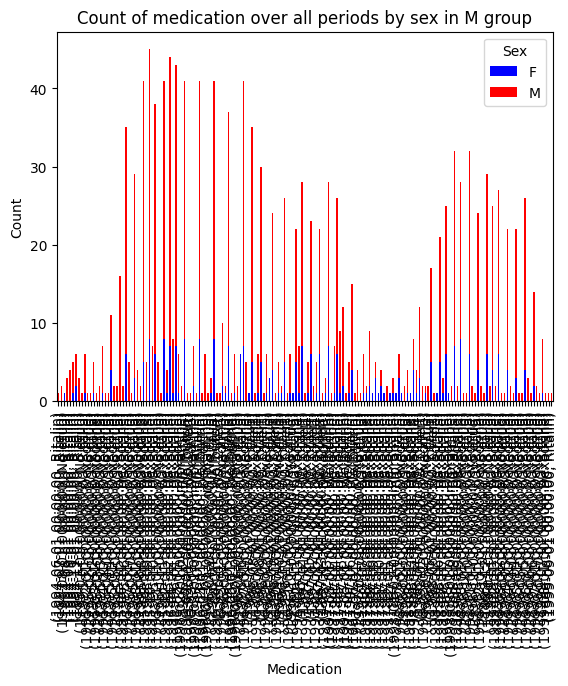

In [726]:

drug_sex_counts = m_drugs.groupby(['interview_date', 'mmdrug', 'sex']).size().unstack(fill_value=0)

drug_counts = m_drugs['mmdrug'].value_counts()

# Create a bar plot
drug_sex_counts.plot(kind='bar', stacked=True, color=['blue', 'red', 'gray'])  # Colors for M, F, Not specified
plt.xlabel('Medication')
plt.ylabel('Count')
plt.title('Count of medication over all periods by sex in M group')
plt.legend(title='Sex')
plt.show()

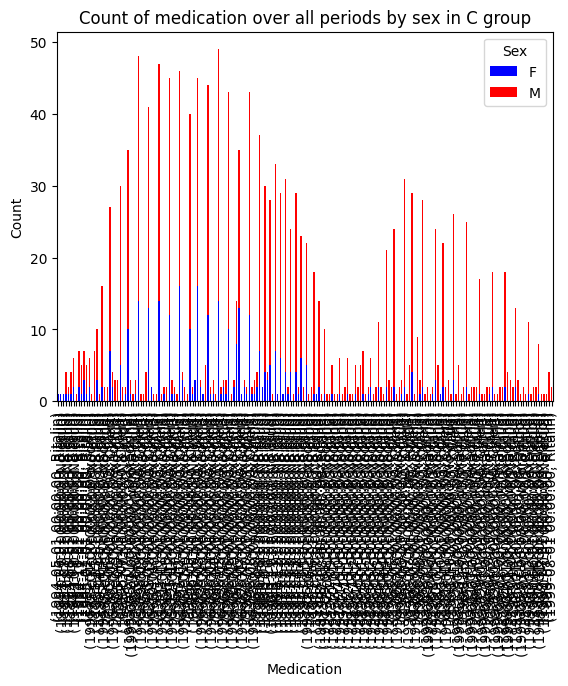

In [727]:
drug_sex_counts = c_drugs.groupby(['interview_date', 'mmdrug', 'sex']).size().unstack(fill_value=0)

drug_counts = c_drugs['mmdrug'].value_counts()

# Create a bar plot
drug_sex_counts.plot(kind='bar', stacked=True, color=['blue', 'red', 'gray'])  # Colors for M, F, Not specified
plt.xlabel('Medication')
plt.ylabel('Count')
plt.title('Count of medication over all periods by sex in C group')
plt.legend(title='Sex')
plt.show()

In [728]:
m_drugs

,subjectkey,trtname,interview_date,sex,mmdrug,mmdose,Morning,Midday,Evening,Night
0,NDAR_INVFE961JZZ,M,1995-09-01,M,Ritalin,5x5x5,5,5,5,0
1,NDAR_INVFE961JZZ,M,1995-10-01,M,Ritalin,7.5x7.5x5,7,5,7,5x5
2,NDAR_INVFE961JZZ,M,1995-11-01,M,Ritalin,7.5x7.5x0,7,5,7,5x0
3,NDAR_INVFE961JZZ,M,1995-12-01,M,Ritalin,7.5x7.5x0,7,5,7,5x0
4,NDAR_INVFE961JZZ,M,1996-01-01,M,Ritalin,7.5x7.5x0,7,5,7,5x0
...,...,...,...,...,...,...,...,...,...,...
1658,NDAR_INVHK435ZRN,M,1995-07-01,M,Ritalin,20x20x10,20,20,10,0
1659,NDAR_INVHK435ZRN,M,1995-08-01,M,Dexedrine,5s0x0,5,0,0,0
1660,NDAR_INVHK435ZRN,M,1995-09-01,M,Dexedrine,20s0x5,20,0,5,0
1661,NDAR_INVHK435ZRN,M,1995-10-01,M,Dexedrine,20s0x5,20,0,5,0


In [729]:
grouped = m_drugs.groupby(['interview_date', 'mmdrug', 'sex']).size().unstack(fill_value=0).stack().reset_index(name='count')
print(drug_sex_counts.head())

grouped.head()

sex                     F  M
interview_date mmdrug       
1994-05-01     Ritalin  1  0
1994-06-01     Ritalin  1  0
1994-07-01     No drug  1  0
               Ritalin  1  3
1994-08-01     No drug  1  1


,interview_date,mmdrug,sex,count
0,1994-06-01,Ritalin,F,0
1,1994-06-01,Ritalin,M,1
2,1994-07-01,Ritalin,F,0
3,1994-07-01,Ritalin,M,2
4,1994-08-01,No drug,F,1


/var/folders/hf/frc4nxb532j7gqr3_36l6kmh0000gn/T/ipykernel_68434/2121198961.py:6: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  bar_plot = sns.barplot(data=grouped, x='interview_date', y='count', hue='mmdrug', dodge=False, palette=palette)


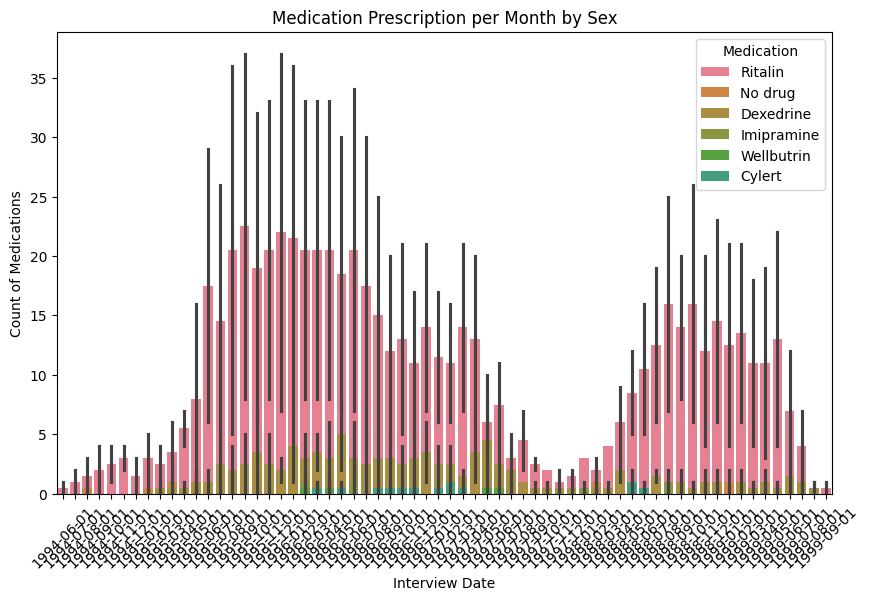

In [733]:
# Create a color palette that differentiates sex within each medication
palette = sns.color_palette("husl", 12)

# Plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=grouped, x='interview_date', y='count', hue='mmdrug', dodge=False, palette=palette)

# Adjust hue based on 'sex'

for i, bar in enumerate(bar_plot.patches):
    sex = grouped.iloc[i]['sex']
    #bar.set_edgecolor('black')
    bar.set_linewidth(1.0 if sex == 'M' else 0.5)  # Thicker line for males, thinner for females
    
plt.title('Medication Prescription per Month by Sex')
plt.xlabel('Interview Date')
plt.ylabel('Count of Medications')
plt.xticks(rotation=45)
plt.legend(title='Medication')
plt.show()

In [732]:
print(p['interview_date'].max())

2009-07-01 00:00:00


In [ ]:
test_sub = 'NDAR_INVFE961JZZ'

In [ ]:
test_m = m_drugs.query("subjectkey == 'NDAR_INVFE961JZZ'")
test_s = m_serv.query("subjectkey == 'NDAR_INVFE961JZZ'")

In [ ]:
m_drugs['interview_date'] = pd.to_datetime(m_drugs['interview_date'])

In [ ]:
test_m['mmdose']

0           5x5x5
1       7.5x7.5x5
2       7.5x7.5x0
3       7.5x7.5x0
4       7.5x7.5x0
5       7.5x7.5x0
6       7.5x7.5x0
7       10x10x2.5
8       10x10x2.5
9       10x10x2.5
10      10x10x2.5
11    12.5x12.5x5
12    12.5x12.5x5
Name: mmdose, dtype: object

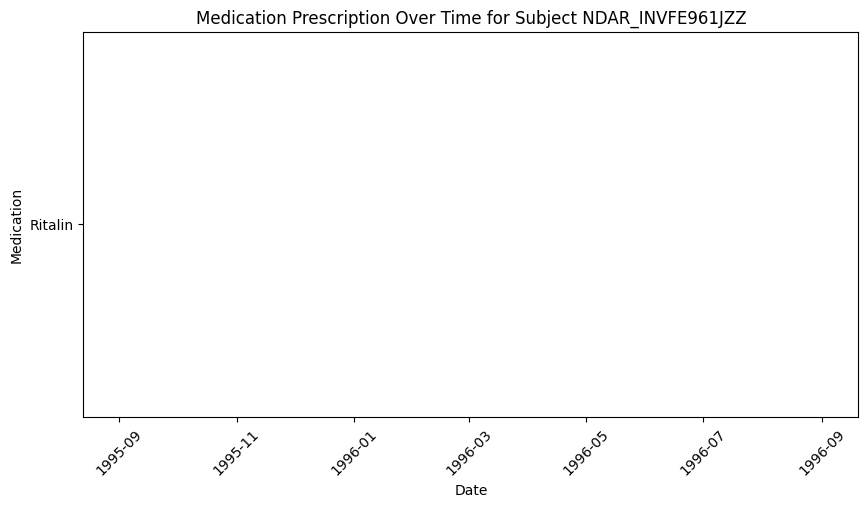

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(test_m['interview_date'], test_m['mmdrug'])
plt.xlabel('Date')
plt.ylabel('Medication')
plt.title('Medication Prescription Over Time for Subject {}'.format('NDAR_INVFE961JZZ'))
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.show()

In [ ]:
test_m['interview_date']

0    1995-09-01
1    1995-10-01
2    1995-11-01
3    1995-12-01
4    1996-01-01
5    1996-02-01
6    1996-03-01
7    1996-04-01
8    1996-05-01
9    1996-06-01
10   1996-07-01
11   1996-08-01
12   1996-09-01
Name: interview_date, dtype: datetime64[ns]

In [ ]:
test_m.loc[:, 'Morning'] = pd.to_numeric(test_m.loc[:, 'Morning'], errors='coerce')
test_m.loc[:, 'Midday'] = pd.to_numeric(test_m.loc[:, 'Midday'], errors='coerce')
test_m.loc[:, 'Night'] = pd.to_numeric(test_m.loc[:, 'Night'], errors='coerce')

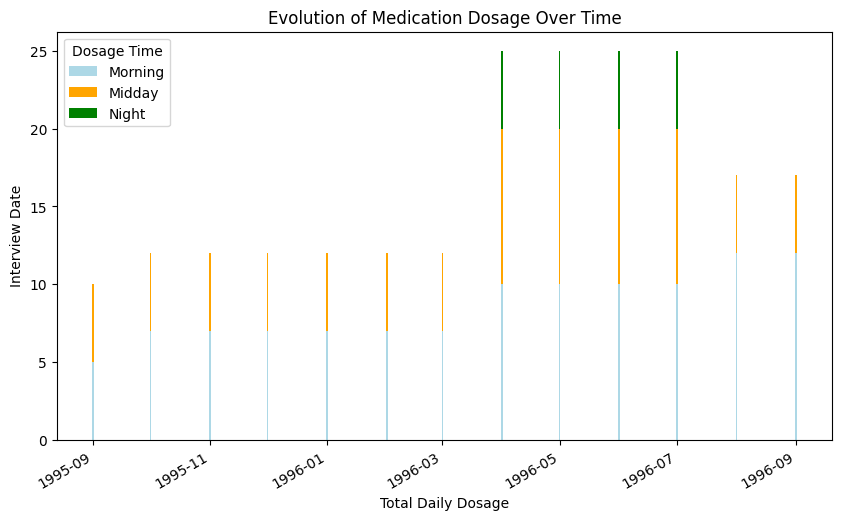

In [ ]:
plt.figure(figsize=(10, 6))

# Creating a stacked bar plot
plt.bar(test_m['interview_date'], test_m['Morning'], label='Morning', color='lightblue')
plt.bar(test_m['interview_date'], test_m['Midday'], bottom=test_m['Morning'], label='Midday', color='orange')
plt.bar(test_m['interview_date'], test_m['Night'], bottom=test_m['Morning'] + test_m['Midday'], label='Night', color='green')

# Adding labels and title
plt.xlabel('Total Daily Dosage')
plt.ylabel('Interview Date')
plt.title('Evolution of Medication Dosage Over Time')
plt.legend(title='Dosage Time')

# Highlight days with no medication prescribed
no_medication_dates = test_m[test_m['mmdose'] == '0']['interview_date']
plt.scatter(no_medication_dates, [0] * len(no_medication_dates), color='red', label='No medication', zorder=5)

# Improve the x-axis date formatting
plt.gcf().autofmt_xdate()

plt.show()

In [736]:
end_treat['eotcat']

1      3
2      2
3      1
4      2
5      1
      ..
420    1
421    2
425    1
430    1
431    1
Name: eotcat, Length: 284, dtype: object

In [749]:
services['paryn'].dropna()

19924    2.0
19925    2.0
19937    2.0
19939    2.0
19940    2.0
        ... 
27304    2.0
27305    2.0
27306    2.0
27307    2.0
27308    2.0
Name: paryn, Length: 5381, dtype: object